In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import preprocessing

In [2]:
yt = pd.read_csv('Tseries.csv', sep=",", encoding="ISO-8859-1", header=0)
yt.head()

,videoId,publishedAtSQL,videoTitle,videoDescription,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,licensedContent,viewCount,likeCount,dislikeCount,commentCount
0,O5X3bnTI1Go,17-05-2020 12:00,Bewafai Full Song | Rochak Kohli Feat.Sachet T...,"Presenting the full song ""Bewafai"" Featuring M...",10.0,Music,235.0,sd,False,1.0,320360.0,13976.0,25966.0,3175.0
1,bTPt1voMr8g,17-05-2020 09:07,Moscow Mashuka (Full Audio): YO YO Honey Singh...,Gulshan Kumar & T-Series presents Bhushan Kuma...,10.0,Music,189.0,hd,False,1.0,277845.0,33600.0,1645.0,3313.0
2,#NAME?,17-05-2020 10:39,Mann Jaage Lyrical | Bittoo Boss | Pulkit Samr...,"Presenting ""MANN JAAGE"" full song from the mov...",10.0,Music,376.0,hd,False,1.0,62515.0,2334.0,373.0,291.0
3,g4Xa7WwOFw0,17-05-2020 05:30,"Saaho: Psycho Saiyaan - REMIX | Prabhas, Shrad...","Presenting the remix of the song ""Psycho Saiya...",10.0,Music,140.0,hd,False,1.0,117328.0,6043.0,604.0,685.0
4,tXIHXccXcCg,16-05-2020 08:31,Song Teaser: Tere Naal | Tulsi Kumar & Darshan...,Presenting the song teaser of the new romantic...,10.0,Music,20.0,hd,False,1.0,996968.0,50636.0,2307.0,2712.0


In [3]:
yt.shape

(14302, 14)

In [4]:
list(yt)

['videoId',
 'publishedAtSQL',
 'videoTitle',
 'videoDescription',
 'videoCategoryId',
 'videoCategoryLabel',
 'durationSec',
 'definition',
 'caption',
 'licensedContent',
 'viewCount',
 'likeCount',
 'dislikeCount',
 'commentCount']

In [5]:
yt = yt[['publishedAtSQL','videoCategoryId','videoCategoryLabel','durationSec','definition','caption','viewCount','likeCount','dislikeCount','commentCount']]

In [6]:
yt

,publishedAtSQL,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount
0,17-05-2020 12:00,10.0,Music,235.0,sd,False,320360.0,13976.0,25966.0,3175.0
1,17-05-2020 09:07,10.0,Music,189.0,hd,False,277845.0,33600.0,1645.0,3313.0
2,17-05-2020 10:39,10.0,Music,376.0,hd,False,62515.0,2334.0,373.0,291.0
3,17-05-2020 05:30,10.0,Music,140.0,hd,False,117328.0,6043.0,604.0,685.0
4,16-05-2020 08:31,10.0,Music,20.0,hd,False,996968.0,50636.0,2307.0,2712.0
...,...,...,...,...,...,...,...,...,...,...
14297,20-01-2011 13:34,10.0,Music,91.0,hd,False,604757.0,357.0,391.0,18.0
14298,13-01-2011 11:27,10.0,Music,212.0,sd,False,40660.0,123.0,654.0,6.0
14299,07-01-2011 09:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14300,03-01-2011 07:10,10.0,Music,171.0,hd,False,11136484.0,24955.0,3210.0,1086.0


In [7]:
yt.isnull().sum()

publishedAtSQL        28
videoCategoryId       37
videoCategoryLabel    37
durationSec           37
definition            37
caption               37
viewCount             37
likeCount             48
dislikeCount          48
commentCount          53
dtype: int64

In [8]:
yt = yt.dropna(axis=0)

In [9]:
yt.shape

(14239, 10)

In [10]:
yt1 = yt.drop_duplicates()
data_no_duplindex_col=0

In [11]:
yt1.describe(include='all')

,publishedAtSQL,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount
count,14239,14239.000000,14239,14239.000000,14239,14239,1.423900e+04,1.423900e+04,14239.000000,14239.000000
unique,12031,NaN,7,NaN,2,2,NaN,NaN,NaN,NaN
top,23-05-2011 13:11,NaN,Music,NaN,hd,False,NaN,NaN,NaN,NaN
freq,15,NaN,10132,NaN,11507,14114,NaN,NaN,NaN,NaN
mean,NaN,13.961444,NaN,269.415479,NaN,NaN,7.597628e+06,3.989282e+04,3684.897746,1701.207388
std,NaN,6.362465,NaN,350.711557,NaN,NaN,3.436710e+07,1.758124e+05,19338.022173,8474.217237
min,NaN,1.000000,NaN,3.000000,NaN,NaN,9.000000e+01,0.000000e+00,0.000000,0.000000
25%,NaN,10.000000,NaN,144.000000,NaN,NaN,6.650000e+04,2.910000e+02,36.000000,19.000000
50%,NaN,10.000000,NaN,213.000000,NaN,NaN,2.982800e+05,1.818000e+03,195.000000,115.000000
75%,NaN,24.000000,NaN,278.000000,NaN,NaN,2.096696e+06,1.250750e+04,1251.000000,674.500000


In [12]:
yt1['publishedAtSQL']  = pd.to_datetime(yt1['publishedAtSQL'])
yt1["publishedAtSQL"]= yt1["publishedAtSQL"].values.astype(float)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

yt1['videoCategoryLabel']= le.fit_transform(yt1['videoCategoryLabel'])
yt1['definition']= le.fit_transform(yt1['definition'])
yt1['caption']= le.fit_transform(yt1['caption'])

In [14]:
yt1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14239 entries, 0 to 14301
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   publishedAtSQL      14239 non-null  float64
 1   videoCategoryId     14239 non-null  float64
 2   videoCategoryLabel  14239 non-null  int32  
 3   durationSec         14239 non-null  float64
 4   definition          14239 non-null  int32  
 5   caption             14239 non-null  int32  
 6   viewCount           14239 non-null  float64
 7   likeCount           14239 non-null  float64
 8   dislikeCount        14239 non-null  float64
 9   commentCount        14239 non-null  float64
dtypes: float64(7), int32(3)
memory usage: 1.0 MB


In [15]:
yt1 = yt1.astype(float)

In [16]:
yt1

,publishedAtSQL,videoCategoryId,videoCategoryLabel,durationSec,definition,caption,viewCount,likeCount,dislikeCount,commentCount
0,1.589717e+18,10.0,4.0,235.0,1.0,0.0,320360.0,13976.0,25966.0,3175.0
1,1.589706e+18,10.0,4.0,189.0,0.0,0.0,277845.0,33600.0,1645.0,3313.0
2,1.589712e+18,10.0,4.0,376.0,0.0,0.0,62515.0,2334.0,373.0,291.0
3,1.589693e+18,10.0,4.0,140.0,0.0,0.0,117328.0,6043.0,604.0,685.0
4,1.589618e+18,10.0,4.0,20.0,0.0,0.0,996968.0,50636.0,2307.0,2712.0
...,...,...,...,...,...,...,...,...,...,...
14296,1.295695e+18,10.0,4.0,79.0,1.0,0.0,885831.0,629.0,310.0,38.0
14297,1.295530e+18,10.0,4.0,91.0,0.0,0.0,604757.0,357.0,391.0,18.0
14298,1.294918e+18,10.0,4.0,212.0,1.0,0.0,40660.0,123.0,654.0,6.0
14300,1.298963e+18,10.0,4.0,171.0,0.0,0.0,11136484.0,24955.0,3210.0,1086.0


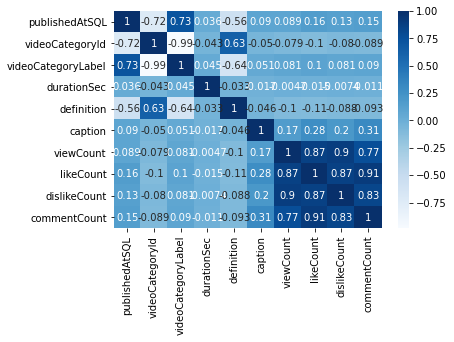

In [17]:
corrMatrix = yt1.corr()
sns.heatmap(corrMatrix, annot=True, cmap="Blues")
plt.rcParams["figure.figsize"] = (34,34)
plt.show()

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [19]:
X = yt1[['publishedAtSQL','durationSec','definition','caption','viewCount','dislikeCount','commentCount']] # Features
y = yt1[['videoCategoryLabel']] # Target variable

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(11391, 7) (2848, 7) (11391, 1) (2848, 1)


### Decision Tree

In [21]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import f1_score
print("F1 Score:",f1_score(y_test, y_pred, average='macro') )

Accuracy: 0.9378511235955056
F1 Score: 0.6512515530633043


### Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier

X = yt1[['publishedAtSQL','durationSec','definition','caption','viewCount','dislikeCount','commentCount']] # Features
y = yt1[['videoCategoryLabel']] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())
y_pred1=clf.predict(X_test)



print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))
from sklearn.metrics import f1_score
print("F1 Score:",f1_score(y_test, y_pred1, average='macro') )


Accuracy: 0.9389044943820225
F1 Score: 0.6199536435648608


### XGBoost

In [23]:
from sklearn.model_selection import train_test_split

X = yt1[['publishedAtSQL','durationSec','definition','caption','viewCount','dislikeCount','commentCount']] # Features
y = yt1[['videoCategoryLabel']] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train.values.ravel())
y_pred2 = model.predict(X_test)

from sklearn.metrics import f1_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print("F1 Score:",f1_score(y_test, y_pred2, average='macro') )

[21:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\asadi\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 0.9476825842696629
F1 Score: 0.6263079336427134


C:\Users\asadi\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
